# Encontrando a intersecção entre um raio e um segmento de reta

**Problema:** encontrar o ponto de intersecção (se existente) entre um raio, definido por um ponto $p=(p_x, p_y)$ e um ângulo $\theta$, e um segmento de reta, definido pelas duas extremidades $q_1=(x_1,y_1)$ e $q_2=(x_2,y_2)$.

Qualquer ponto na reta pode ser representado por $p + r d$, onde $d = (\cos(\theta), \sin(\theta))$ e $r \geq 0$. Qualquer ponto no segmento de reta pode ser representado por $q_1 + s (q_2 - q_1)$, com $0 \leq s \leq 1$.

A intersecção entre o raio e o segmento de reta é o ponto que satisfaz 

$$\begin{equation*}p + r d = q_1 + s (q2 - q1)\end{equation*}$$

Considere o vetor $d^\perp = (\sin(\theta), -\cos(\theta))$. Temos que $d^T\cdot d^\perp = \cos(\theta)\sin(\theta)-\cos(\theta)\sin(\theta) = 0$.

Daí, da primeira equação temos:

$$\begin{align*}
p + r d &= q_1 + s (q2 - q1) \\
(p + r d)^T\cdot d^\perp &= (q_1 + s (q2 - q1))^T\cdot d^\perp \\
p^T\cdot d^\perp &= (q_1 + s (q2 - q1))^T\cdot d^\perp \\
p_x\sin(\theta) - p_y\cos(\theta) &= (sx_2+(1-s)x_1)\sin(\theta) - (sy_2+(1-s)y_1)\cos(\theta) \\
p_x\sin(\theta) - p_y\cos(\theta) &= sx_2\sin(\theta)+x_1\sin(\theta)-sx_1\sin(\theta) - sy_2\cos(\theta)-y_1\cos(\theta)+sy_1\cos(\theta) \\
(p_x-x_1)\sin(\theta) + (y_1 - p_y)\cos(\theta) &= s((x_2-x_1)\sin(\theta)+(y_1-y_2)\cos(\theta)) \\
s &= \frac{(p_x-x_1)\sin(\theta) + (y_1 - p_y)\cos(\theta)}{(x_2-x_1)\sin(\theta)+(y_1-y_2)\cos(\theta)} \\
\end{align*}$$

Isolando $r$ na primeira equação temos:

$$r = \frac{x_1 + s (x_2 - x_1) - p_x}{\cos(\theta)}$$

se $\cos(\theta) \neq 0$, senão

$$r = \frac{y_1 + s (y_2 - y_1) - p_y}{\sin(\theta)}$$

O ponto de intersecção existe se $r \geq 0$ e $0 \leq s \leq 1$.

In [1]:
%matplotlib inline

import math
from collections import namedtuple

import numpy as np
import matplotlib.pyplot as plt

from segment import Segment, random_segment
from visible_segments import VisibleSegments
from math_utils import dist
from intersection2 import find_intersections

In [4]:
# Number of random segments
N = 50
origin = np.array([5, 4])
segments = [random_segment(origin) for _ in range(N)]
intersections, visible_segments = find_intersections(origin, segments)

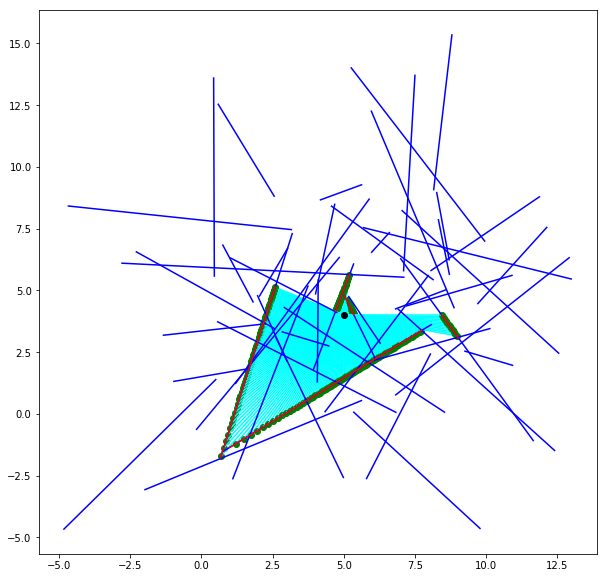

In [5]:
# Plot
fig = plt.figure(figsize=(10,10))

for intersection in intersections:
    pt = intersection.intersection
    plt.plot(pt[0], pt[1], color='green', marker='o')
    plt.plot([pt[0], origin[0]], [pt[1], origin[1]], color='cyan')

def plot_segments(segs, color):
    for segment in segs:
        plt.plot([segment.p1[0], segment.p2[0]], [segment.p1[1], segment.p2[1]], color=color)

plot_segments(segments, 'blue')
plot_segments(visible_segments, 'red')

plt.plot([origin[0]], [origin[1]], marker='o', color='k')

## Descrição do plot

No plot acima, os segmentos azuis são todos os segmentos criados aleatoriamente. Os segmentos vermelhos são partes dos segmentos azuis que são visíveis a partir do ponto preto. Os pontos verdes são os pontos de intersecção dos raios saindo do ponto preto. Os raios (ciano) são espaçados de 1 grau.